In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
df_raw = pd.read_csv('C:/Users/user/OneDrive/바탕 화면/Github/Machine-Learning-Term-Project/Machine_Learning_Term_Project/user_listening_history_v1-1.csv')
print(df_raw.head())


                                    user_id                track_id  playcount
0  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  0Hf4aIJpsN4Os2f0y0VqWl          3
1  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  14DLZ9FaTofhnXBiV38axE          2
2  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  1QPreu0BNOrUfEb8HTd2qG          5
3  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  20I8RduZC2PWMWTDCZuuAN          6
4  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  2V65y3PX4DkRhy1djlxd9p         11


In [29]:
rename_map = {}
for col in df_raw.columns:
    if 'user' in col.lower():
        rename_map[col] = 'user_id'
    elif 'song' in col.lower() or 'track' in col.lower():
        rename_map[col] = 'song_id'

df_raw = df_raw.rename(columns=rename_map)

if 'rating' not in df_raw.columns:
    df_raw['rating'] = 1

df_raw = df_raw.drop_duplicates(subset=['user_id', 'song_id'])
df = df_raw.dropna(subset=['user_id', 'song_id', 'rating'])

save_path = r'C:/Users/user/OneDrive/바탕 화면/Github/Machine-Learning-Term-Project/Machine_Learning_Term_Project'
os.makedirs(save_path, exist_ok=True)

# CSV 파일 저장
output_file = os.path.join(save_path, 'user_song_data.csv')
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(df.head())

                                    user_id                 song_id  \
0  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  0Hf4aIJpsN4Os2f0y0VqWl   
1  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  14DLZ9FaTofhnXBiV38axE   
2  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  1QPreu0BNOrUfEb8HTd2qG   
3  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  20I8RduZC2PWMWTDCZuuAN   
4  0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603  2V65y3PX4DkRhy1djlxd9p   

   playcount  rating  
0          3       1  
1          2       1  
2          5       1  
3          6       1  
4         11       1  


In [30]:
user_song_matrix = df.pivot_table(
    index='user_id',
    columns='song_id',
    values='rating',
    fill_value=0
)

user_song_matrix.head()

song_id,01K4zKU104LyJ8gMb7227B,04KTF78FFg8sOHC1BADqbY,04mAOoQNsXmDJlyupJwmkO,05RgAMGypEvqhNs5hPCbMS,05wIrZSwuaVWhcv5FfqeH0,06s3QtMJVXw1AJX3UfvZG1,07UFnnK3uPIuKv5Rs9TmXl,08mG3Y1vljYA6bvDt4Wqkj,09CtPGIpYB4BrO8qb1RGsF,0ARK753YaiJbpLUk7z5yIM,...,7lQ8MOhq6IN2w8EYcFNSUk,7mitXLIMCflkhZiD34uEQI,7nVQ8mo77KaUvhUQzh4vMy,7qH9Z4dJEN0l9bidizW7fq,7snnTlaWaN39nfN1PhUaT8,7vcDJCAO356RYkCfiUozmE,7wCmS9TTVUcIhRalDYFgPy,7xQAfvXzm3AkraOtGPWIZg,7ySC0IjVS1PMEdsZOvsUK2,7yrTny7FLWLbfIzsxoicWj
user_id,,,,,,,,,,,,,,,,,,,,,
0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2ebcdda7e5bb29db6385a6705a4b885a4e8be1b5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67c9b563dbae5e4debf83dcf70f8fcace5db37b5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6c5f906dce1eaf270bd11f0c3cfcee1dbe72acd3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
6fc94a3d0b3ee9fdbcede27c2cdb642dfceb8ab2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
user_similarity = cosine_similarity(user_song_matrix)
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_song_matrix.index,
    columns=user_song_matrix.index
)

user_similarity_df.head()

user_id,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,2ebcdda7e5bb29db6385a6705a4b885a4e8be1b5,67c9b563dbae5e4debf83dcf70f8fcace5db37b5,6c5f906dce1eaf270bd11f0c3cfcee1dbe72acd3,6fc94a3d0b3ee9fdbcede27c2cdb642dfceb8ab2,7281decf7f5c642aecaa5fbd31317f45fe21cdcb,7b6939cd71c6e2ea73fec2a86bf1cf293720328e,a888a52132c0dbc9bbabffbcbbd9e4e0a2025af2,ac6cd49cbe7b87bba0858d530ebbae5c5d28b2a3,b5eaef5a02bbd56fa7be24b1fd010eb1cae9cdba,cd169e6bbde5b63b9bfbdad998b45bb30cfaf029,ce84a0de7cae70f3ef5ababd59a9ed55e5eabceb,cedc0de9183c8f57efe78ab33b2ae40d6bad8d5a,d2f5731b0c098d1c1794ca8dfb9d04ba4b5e36ac,dadfccbce096dda7aeaf1a395aa5d0b2fa49cd50,e033f1b2bcb86f540af9a1f4adbf8541c89cf4ec,e0fcfd88dbbfc8329ba956a012d2465c52f65e24,effd0fae7ecfb2fe6ec05fe880ef9e17b0d83f93,fad0b1fc4a5e70ebfead73dbcea823cc4473bac1,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc
user_id,,,,,,,,,,,,,,,,,,,,
0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,1.000000,0.0,0.0,0.0,0.071611,0.000000,0.0,0.000000,0.000000,0.074125,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2ebcdda7e5bb29db6385a6705a4b885a4e8be1b5,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.061314,0.000000,0.0,0.000000,0.000000,0.0,0.000000
67c9b563dbae5e4debf83dcf70f8fcace5db37b5,0.000000,0.0,1.0,0.0,0.000000,0.138343,0.0,0.000000,0.083624,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.077850
6c5f906dce1eaf270bd11f0c3cfcee1dbe72acd3,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.0,0.065372,0.065372,0.062994,0.0,0.0,0.0,0.000000,0.074536,0.0,0.055556,0.000000,0.0,0.060858
6fc94a3d0b3ee9fdbcede27c2cdb642dfceb8ab2,0.071611,0.0,0.0,0.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069007,0.0,0.000000


In [32]:
def recommend_songs_userCF(target_user_id, top_n=10, top_k_users=10):
    # (1) 해당 유저와 비슷한 상위 K명의 유저 선택
    similar_users = user_similarity_df[target_user_id].sort_values(ascending=False)[1:top_k_users+1]
    
    # (2) 비슷한 유저들의 곡 데이터 추출
    similar_users_songs = user_song_matrix.loc[similar_users.index]

    # (3) 가중 합계 (유사도 * 평점)
    weighted_scores = similar_users_songs.T.dot(similar_users)

    # (4) 유사도 총합으로 정규화 → 점수 차이를 더 명확하게
    weighted_scores = weighted_scores / similar_users.sum()

    # (5) 이미 들은 곡 제외
    listened = user_song_matrix.loc[target_user_id]
    already_listened = listened[listened > 0].index
    weighted_scores = weighted_scores[~weighted_scores.index.isin(already_listened)]

    # (6) 상위 추천 곡 반환
    recommended = weighted_scores.sort_values(ascending=False).head(top_n)
    return recommended


In [33]:
target_user = user_song_matrix.index[0]
recommended = recommend_songs_userCF(target_user, top_n=10)

print(f"🎧 Recommended songs for user '{target_user}':")
print(recommended)

🎧 Recommended songs for user '0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603':
song_id
1S3SAFqLBWk3HaR5UyXp43    0.508623
0nbXyq5TXYPCO7pr3N8S4I    0.508623
771KDfpsOtJPQmocQpMdkR    0.508623
0RLLvYBopDwooCyvnTwgYu    0.508623
1pr9TZGOXeJUggIal1Wq3R    0.508623
0U0ldCRmgCqhVvD6ksG63j    0.508623
3YKptz29AsOlm7WAVnztBh    0.508623
2JN3ugW1cEahbYw0I5mw5U    0.508623
0bYg9bo50gSsH3LtXe2SQn    0.508623
3AjSfp5FDvwtMU9XBsbS8j    0.508623
dtype: float64


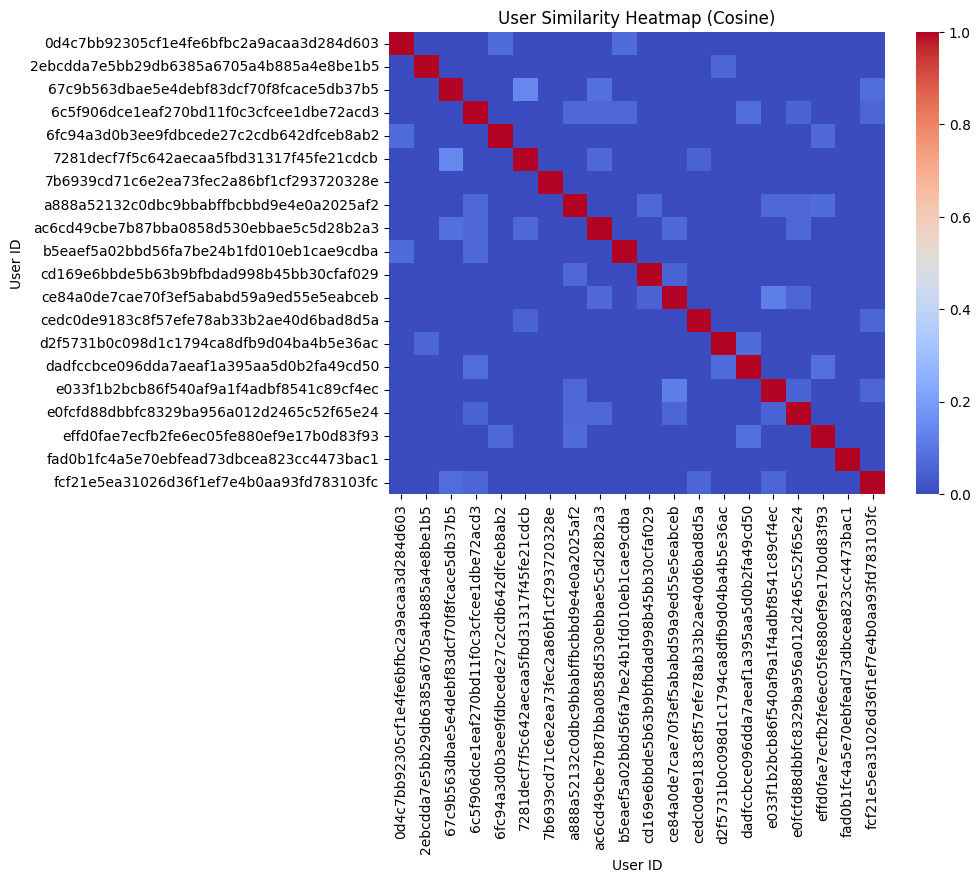

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(user_similarity_df, cmap='coolwarm', annot=False)
plt.title('User Similarity Heatmap (Cosine)')
plt.xlabel('User ID')
plt.ylabel('User ID')
plt.show()

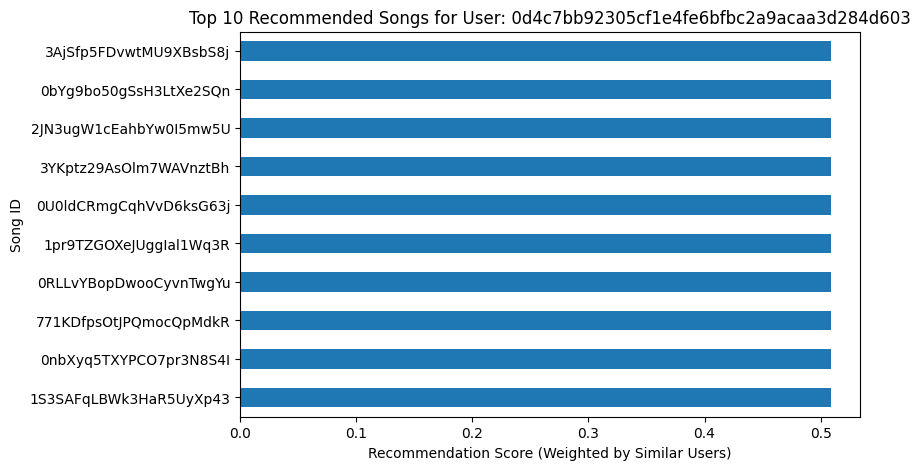

In [35]:
plt.figure(figsize=(8, 5))
recommended.sort_values(ascending=True).plot(kind='barh')
plt.title(f"Top {len(recommended)} Recommended Songs for User: {target_user}")
plt.xlabel('Recommendation Score (Weighted by Similar Users)')
plt.ylabel('Song ID')
plt.show()